In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv("Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Check for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# Dataset summary
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [15]:
# Split features and target
X = df.drop(columns=["Species"])  # Features
y = df["Species"]  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for models like SVM, KNN, etc.)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [72]:
# Initialize the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


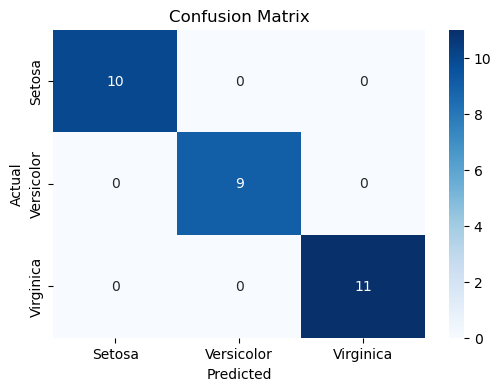

In [80]:

# Define species names (Iris dataset has 3 classes)
species_names = ["Setosa", "Versicolor", "Virginica"]

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_names, yticklabels=species_names)

# Labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



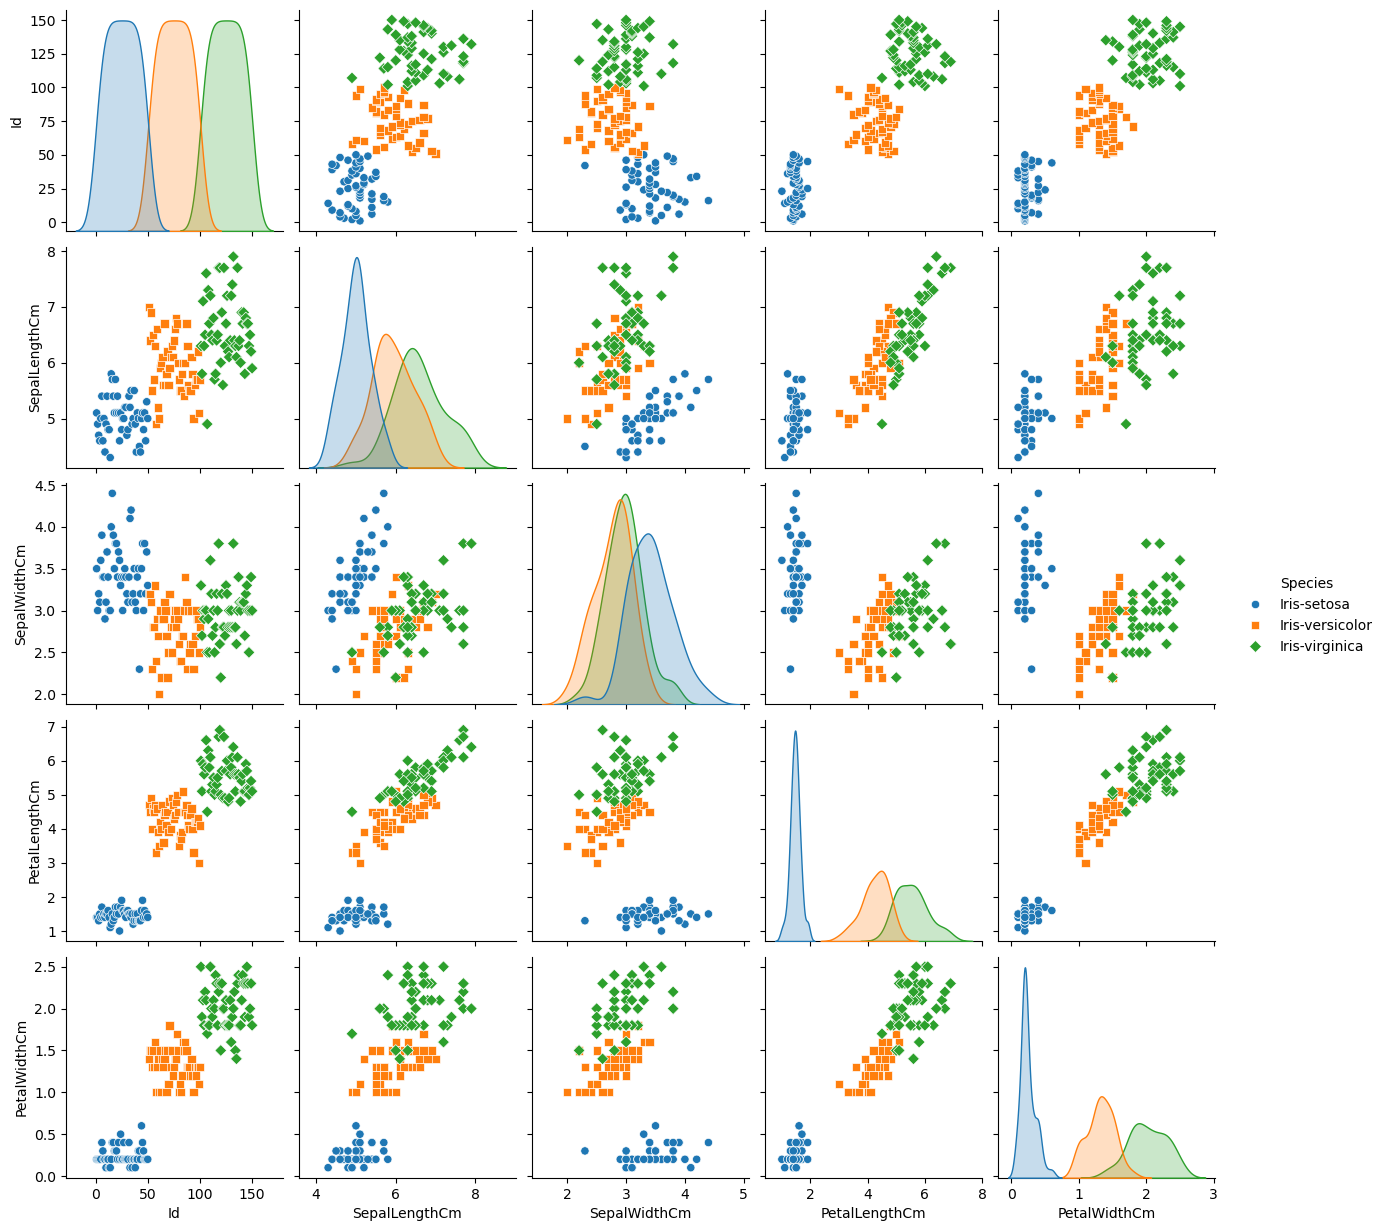

In [31]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])
plt.show()


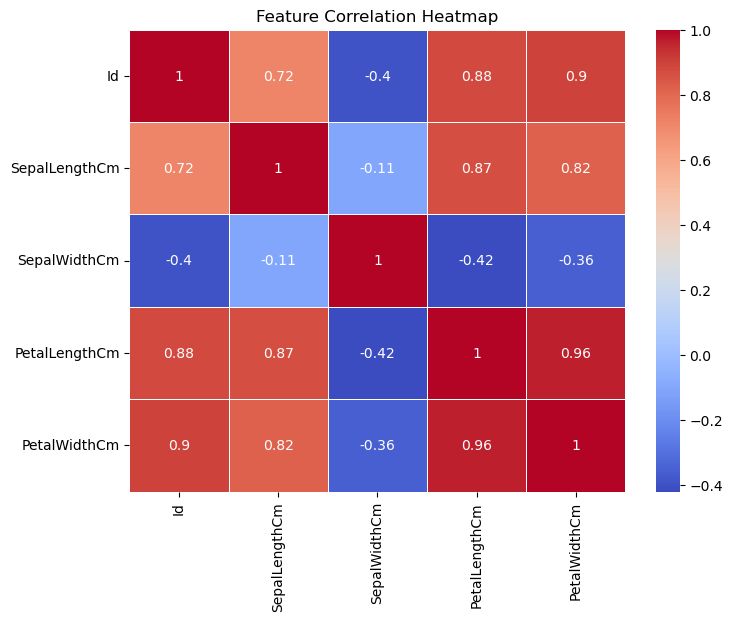

In [35]:
# Drop categorical column before correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [39]:
df.shape

(150, 6)

In [47]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

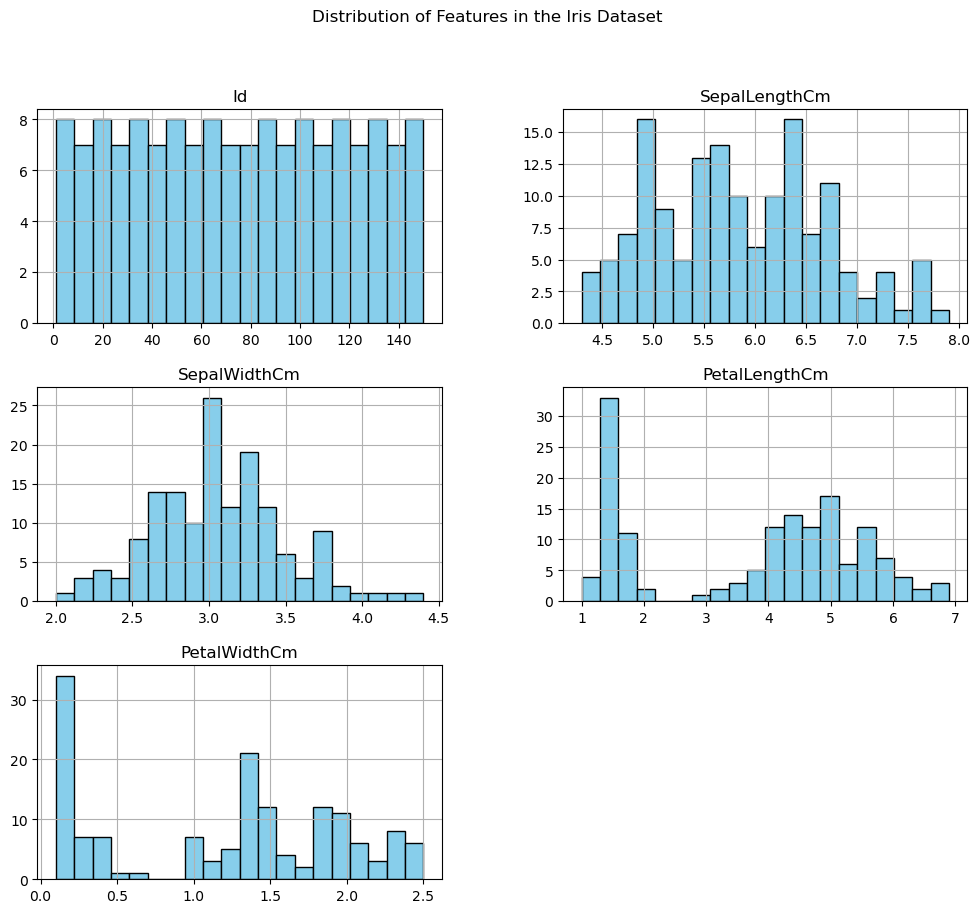

In [56]:

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram for each numerical column
df.drop(columns=["Species"]).hist(bins=20, figsize=(12, 10), color="skyblue", edgecolor="black")

# Show the plots
plt.suptitle("Distribution of Features in the Iris Dataset")
plt.show()


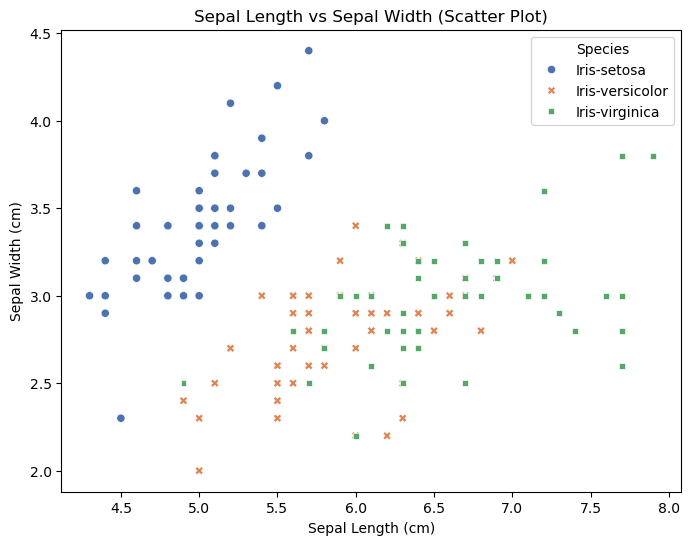

In [60]:
plt.figure(figsize=(8, 6))

# Scatter plot with species differentiation
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", style="Species", palette="deep")

# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width (Scatter Plot)")
plt.legend(title="Species")
plt.show()

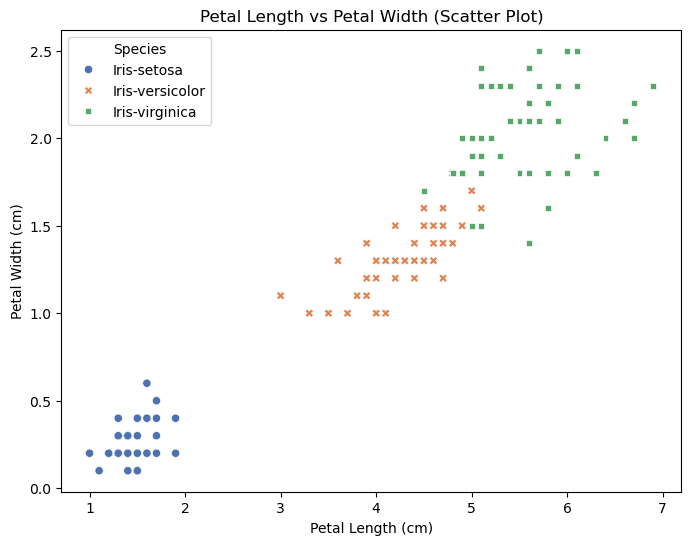

In [62]:
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", style="Species", palette="deep")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width (Scatter Plot)")
plt.legend(title="Species")
plt.show()


In [64]:
df.corr(numeric_only = True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [70]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Convert species column to numerical values
df["species_encoded"] = label_encoder.fit_transform(df["Species"])

# Display the first few rows
print(df[["Species", "species_encoded"]].head())

       Species  species_encoded
0  Iris-setosa                0
1  Iris-setosa                0
2  Iris-setosa                0
3  Iris-setosa                0
4  Iris-setosa                0
